In [33]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [34]:
df=pd.read_csv('Dataset.csv')

In [35]:
df

,SI.NO,DATE,NAME,AGE,SEX,ASSO MEDICAL PROB,H/O INJURY/SURGERY,DRUG HISTORY,FREQUENCY,avg
0,1,01-02-2017,PATIENT_1,29,Male,no,no,no,"115, 115, 113",114.30
1,2,01-03-2017,PATIENT_2,36,Female,no,no,no,"95,94,96",94.00
2,3,01-03-2017,PATIENT_3,37,Male,no,no,no,"80,82,81",81.00
3,4,01-03-2017,PATIENT_4,37,Female,no,no,no,"100, 101, 100",100.33
4,5,01-03-2017,PATIENT_5,38,female,no,no,no,"9,91,00,100.40",99.80
...,...,...,...,...,...,...,...,...,...,...
995,996,12/29/2017,PATIENT_996,72,Male,no,no,no,"68, 69, 68",68.30
996,997,12/29/2017,PATIENT_997,72,Male,"Yes(Diabetes,Blockage in Heart)",shouler surgery,yes,"69,70,71",70.00
997,998,12/31/2017,PATIENT_998,74,Female,"yes(diabetes,bp)",knee surgery,yes,"63,62,62.6",62.53
998,999,12/31/2017,PATIENT_999,76,Male,"yes(diabetes,kidney stone)",no,no,"62,61,62.5",61.83


In [36]:
df.drop(['SI.NO','DATE','NAME'],axis=1,inplace=True)

In [37]:
df.isnull().sum()

AGE                   0
SEX                   0
ASSO MEDICAL PROB     0
H/O INJURY/SURGERY    0
DRUG HISTORY          0
FREQUENCY             0
avg                   0
dtype: int64

In [38]:
df.describe()

,AGE,avg
count,1000.000000,1000.000000
mean,56.520000,78.346700
std,12.390445,12.431321
min,29.000000,61.330000
25%,45.000000,69.000000
50%,56.500000,76.416500
75%,67.000000,88.330000
max,85.000000,114.300000


In [39]:
df.head()

,AGE,SEX,ASSO MEDICAL PROB,H/O INJURY/SURGERY,DRUG HISTORY,FREQUENCY,avg
0,29,Male,no,no,no,"115, 115, 113",114.30
1,36,Female,no,no,no,"95,94,96",94.00
2,37,Male,no,no,no,"80,82,81",81.00
3,37,Female,no,no,no,"100, 101, 100",100.33
4,38,female,no,no,no,"9,91,00,100.40",99.80


In [40]:
df.columns

Index(['AGE', 'SEX', 'ASSO MEDICAL PROB', 'H/O INJURY/SURGERY', 'DRUG HISTORY',
       'FREQUENCY', 'avg'],
      dtype='object')

In [41]:
cols=['SEX', 'ASSO MEDICAL PROB', 'H/O INJURY/SURGERY', 'DRUG HISTORY']

In [42]:
for i in cols:
  print(i +" : ")
  print(df[i].unique())

SEX : 
['Male' 'Female' 'female' 'male']
ASSO MEDICAL PROB : 
['no' 'No' 'yes(diabetes)' 'yes (diabetes)' 'yes(bp)' 'kidney stone'
 'yes(increase in heart rate)' 'Yes(Diabetes,bp)' 'yes(bp dabetes)'
 'yes(diabetes,bp)' 'Yes(Diabetes,Blockage in Heart)'
 'yes(diabetes,kidney stone)' 'yes (diabetes,heart blockage)']
H/O INJURY/SURGERY : 
['no' 'vericose vein surgery' 'uteres removal' 'kidney stone opreration'
 'uterus surgery' 'yes(diverticulities)' 'shouler surgery' 'knee surgery'
 'yes(open heart surgery)']
DRUG HISTORY : 
['no' 'yes' 'yes(ecosprin)']


In [43]:
df['SEX']=df['SEX'].map({'Male':1,'Female':0,'female':0,'male':1})
df['ASSO MEDICAL PROB']=df['ASSO MEDICAL PROB'].map({'no':0,'No':0,'yes(diabetes)':1,'yes (diabetes)':1,'yes(bp)':2,'kidney stone':3,'yes(increase in heart rate)':4,'Yes(Diabetes,bp)':5,'yes(bp dabetes)':5,'yes(diabetes,bp)':5,'Yes(Diabetes,Blockage in Heart)':6,'yes (diabetes,heart blockage)':6,'yes(diabetes,kidney stone)':7})
df['H/O INJURY/SURGERY']=df['H/O INJURY/SURGERY'].map({'no':0,'vericose vein surgery':1,'uteres removal':2,'kidney stone opreration':3,'uterus surgery':4,'yes(diverticulities)':5,'shouler surgery':6,'knee surgery':7,'yes(open heart surgery)':8})
df['DRUG HISTORY']=df['DRUG HISTORY'].map({'no':0,'yes':1,'yes(ecosprin)':2})

                             

In [44]:
df

,AGE,SEX,ASSO MEDICAL PROB,H/O INJURY/SURGERY,DRUG HISTORY,FREQUENCY,avg
0,29,1,0,0,0,"115, 115, 113",114.30
1,36,0,0,0,0,"95,94,96",94.00
2,37,1,0,0,0,"80,82,81",81.00
3,37,0,0,0,0,"100, 101, 100",100.33
4,38,0,0,0,0,"9,91,00,100.40",99.80
...,...,...,...,...,...,...,...
995,72,1,0,0,0,"68, 69, 68",68.30
996,72,1,6,6,1,"69,70,71",70.00
997,74,0,5,7,1,"63,62,62.6",62.53
998,76,1,7,0,0,"62,61,62.5",61.83


In [45]:
for i in cols:
  print(i +" : ")
  print(df[i].unique())

SEX : 
[1 0]
ASSO MEDICAL PROB : 
[0 1 2 3 4 5 6 7]
H/O INJURY/SURGERY : 
[0 1 2 3 4 5 6 7 8]
DRUG HISTORY : 
[0 1 2]


In [46]:
df.columns

Index(['AGE', 'SEX', 'ASSO MEDICAL PROB', 'H/O INJURY/SURGERY', 'DRUG HISTORY',
       'FREQUENCY', 'avg'],
      dtype='object')

In [47]:
cols2=['AGE', 'SEX', 'ASSO MEDICAL PROB', 'H/O INJURY/SURGERY', 'DRUG HISTORY']

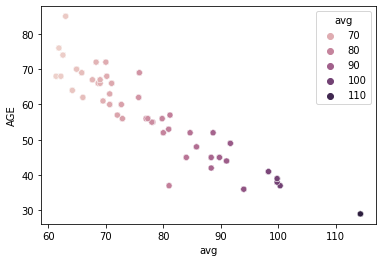

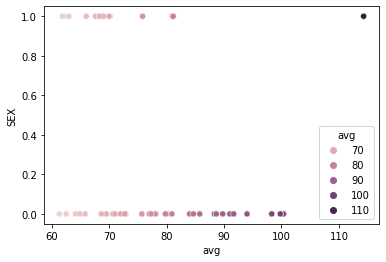

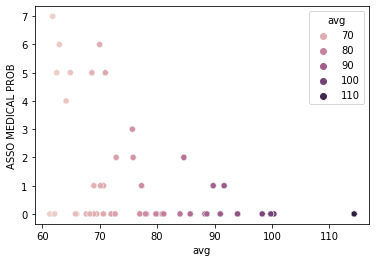

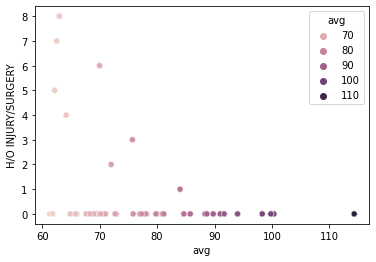

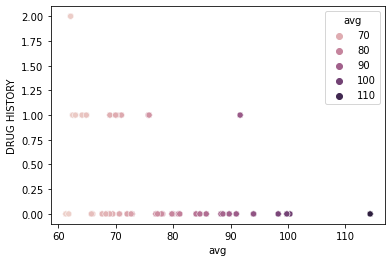

In [48]:
for i in cols2:
  sns.scatterplot(x=df['avg'],y=df[i],hue=df['avg'])
  plt.show()

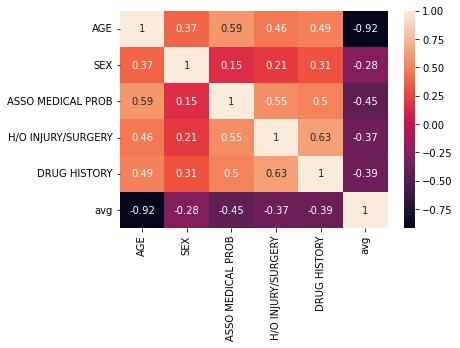

In [49]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [50]:
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [51]:
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")

In [52]:
x=df.drop(['avg','FREQUENCY'],axis=1)
y=df['avg'].astype(int)

In [53]:
print(x)
print(y)

     AGE  SEX  ASSO MEDICAL PROB  H/O INJURY/SURGERY  DRUG HISTORY
0     29    1                  0                   0             0
1     36    0                  0                   0             0
2     37    1                  0                   0             0
3     37    0                  0                   0             0
4     38    0                  0                   0             0
..   ...  ...                ...                 ...           ...
995   72    1                  0                   0             0
996   72    1                  6                   6             1
997   74    0                  5                   7             1
998   76    1                  7                   0             0
999   85    1                  6                   8             1

[1000 rows x 5 columns]
0      114
1       94
2       81
3      100
4       99
      ... 
995     68
996     70
997     62
998     61
999     63
Name: avg, Length: 1000, dtype: int32


In [54]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1,test_size=0.3)

In [55]:
xtrain.count

<bound method DataFrame.count of      AGE  SEX  ASSO MEDICAL PROB  H/O INJURY/SURGERY  DRUG HISTORY
731   62    0                  3                   3             1
716   52    0                  2                   0             0
640   68    1                  0                   5             2
804   38    0                  0                   0             0
737   67    1                  1                   0             1
..   ...  ...                ...                 ...           ...
767   52    0                  0                   0             0
72    56    0                  0                   0             0
908   42    0                  0                   0             0
235   66    0                  5                   0             0
37    67    1                  1                   0             1

[700 rows x 5 columns]>

In [56]:
ytrain.count

<bound method Series.count of 731    75
716    84
640    62
804    99
737    69
       ..
767    88
72     77
908    88
235    68
37     69
Name: avg, Length: 700, dtype: int32>

In [57]:
classifier.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [58]:
ypred2= classifier.predict(xtest)

In [59]:
print(ypred2)

[ 98  80  81  80  75  69  84  89  80  63  70  75  80  68  77  64  99  99
 114  70  81  77  61  81  64  78  88  62  61  72  89  80  64  64  99  72
  72  77  64  91  77  70  62  94  64  72  69  70 100  68  85  71  61  68
  61  99  68  72  69  68  98  67  68  71  77  84  91  84  72  80  91  78
  70  91  98  80  70  67  75  67  99  75  99  98  94  75  85  65  77  72
  99  61  80  99  91  77  91  65  88  99  68  85  88  99  72  72  80  67
  69  64  69  68 114  91  80  72  88  63  78  64  66  88 100  64  69  64
  63  70  72  75  94  61  91  81  62  89  81  98  88  78  77  80  67  68
  88  91  84  84  99  81  99  78  88  75  99  81  99  94  71  72  91  99
  72  67  69  77  64  62  62  68  81  75  71  65  72  94  69  84  77  80
  84 114  64  77  75  91 114  77  69  64  63  81  64  71  72  66  72 114
  88  98  70  64  70  62  77  69  78  84  62  81  72  99  68  69  77  99
  99  72  68  89  91  75  94  78  64  88  98  62  67  99  63 114  64  72
 100  70  64  66  75  84  85  68  78  63  89  68  6

In [60]:
accuracy_score(ytest,ypred2)

0.94

In [61]:
Age=29
Gender=1
Prob=3
INJURY=2
DRUG=1

In [62]:
test=[[Age,Gender,Prob,INJURY,DRUG]]

In [63]:
def give_pred(test):
    prediction=classifier.predict(test)
    print(prediction)
    if prediction > 100 :
      return 'Osteoporotic'
    elif prediction > 60 and prediction < 100 :
      return 'Osteopenia'
    elif prediction < 60:
      return 'Normal'

In [64]:
print(give_pred(test))

[75]
Osteopenia


c:\Users\manas\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
